# Introduction to Open Street Maps Python Library (OSMnx)

Github [annotated version](https://github.com/csaatechnicalarts/ML_Bootcamp/blob/main/OSMnx_Bootcamp/Intro_OSMnx.ipynb).

In [2]:
!pip install osmnx
!pip install matplotlib

import osmnx as ox
import matplotlib
import matplotlib.pyplot as plt

print(ox.__version__)
print(matplotlib.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 42.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.5 MB/s eta 0:00:00
2.0.4
3.10.1


In [3]:
minato_poi = ox.features_from_place('Minato, Tokyo', tags={'amenity': ['cafe', 'pub'], 'tourism':['museum', 'hotel', 'attraction'], 'building':['office', 'retail']})
print(f"{len(minato_poi)} elements in {type(minato_poi)}\n\n")
print(minato_poi.columns)
minato_poi.head(3)

1293 elements in <class 'geopandas.geodataframe.GeoDataFrame'>


Index(['geometry', 'amenity', 'branch', 'name', 'name:en', 'phone', 'source',
       'wheelchair', 'was:cuisine', 'was:name',
       ...
       'type', 'alt_name:es', 'communication:radio', 'contact:tiktok',
       'man_made', 'material', 'name:et', 'tower:construction', 'tower:type',
       'building:part'],
      dtype='object', length=207)


geometry amenity branch      name  \
element id                                                               
node    393075631  POINT (139.74866 35.64395)    cafe  田町東口店  エクセルシオール   
        474605280  POINT (139.75225 35.66847)     pub    NaN    山本魚吉商店   
        474605284  POINT (139.75436 35.66781)     pub    NaN        月島   

                      name:en         phone                 source wheelchair  \
element id                                                                      
node    393075631    EXELCIOR  03-5730-2620  image,2012-10-19;Bing        yes   
        474605280         NaN           NaN                    NaN        NaN   
        474605284  Tsukishima           NaN                    NaN        NaN   

                  was:cuisine was:name  ... type alt_name:es  \
element id                              ...                    
node    393075631         NaN      NaN  ...  NaN         NaN   
        474605280        お好み焼       泉州  ...  NaN         NaN   
        474605284         NaN      NaN  ...  NaN         NaN   

                  communication:radio contact:tiktok man_made material  \
element id                                                               
node    393075631                 NaN            NaN      NaN      NaN   
        474605280                 NaN            NaN      NaN      NaN   
        474605284                 NaN            NaN      NaN      NaN   

                  name:et tower:construction tower:type building:part  
element id                                                             
node    393075631     NaN                NaN        NaN           NaN  
        474605280     NaN                NaN        NaN           NaN  
        474605284     NaN                NaN        NaN           NaN  

[3 rows x 207 columns]

<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

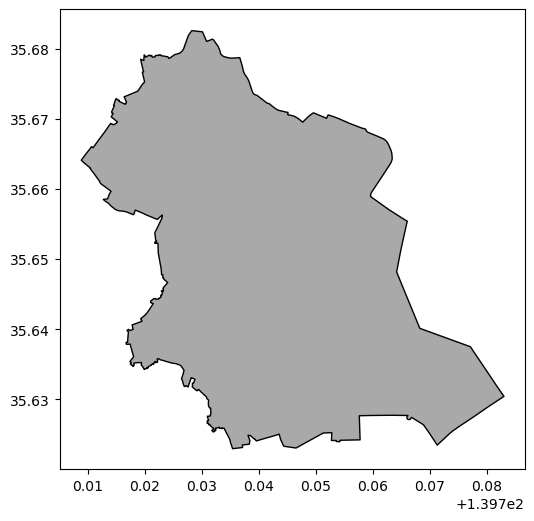

In [4]:
admin_minato = ox.geocode_to_gdf('Minato, Tokyo')
print(type(admin_minato))
admin_minato.plot(color='darkgrey', edgecolor='k', figsize=(6,6))

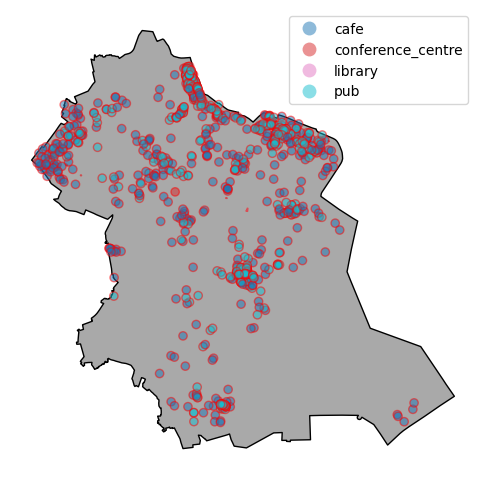

In [5]:
# Create a plot to visualize the admin boundary and POIs
f, ax = plt.subplots(1, 1, figsize=(6,6))

# Plot the administrative boundary
admin_minato.plot(ax=ax, color='darkgrey', edgecolor='k')

# Plot the amenity POI
minato_poi.plot(column='amenity', ax=ax, alpha=0.5, edgecolor='red', legend=True)

# Customize the plot
ax.axis('off')
plt.show()

In [7]:
minato_district = ox.geocode_to_gdf('Minato, Tokyo')
print(type(minato_district))

minato_polygon = minato_district.geometry.values[0]
print(type(minato_polygon))

minato_parks = ox.features_from_polygon(minato_polygon, tags={'leisure': 'park'})
print(type(minato_parks))
print(f"{len(minato_parks)} elements in {type(minato_parks)}\n\n")
minato_parks.columns


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'geopandas.geodataframe.GeoDataFrame'>
148 elements in <class 'geopandas.geodataframe.GeoDataFrame'>




Index(['geometry', 'created_by', 'leisure', 'name', 'name:en', 'name:de',
       'name:es', 'name:ja', 'name:zh', 'opening_hours', 'tourism', 'wikidata',
       'wikimedia_commons', 'wikipedia', 'name:ja_rm', 'source', 'layer',
       'note', 'note:ja', 'source_ref', 'toilets:wheelchair', 'wheelchair',
       'name:ko', 'name:ja_kana', 'description', 'operator',
       'addr:block_number', 'addr:city', 'addr:housenumber',
       'addr:neighbourhood', 'addr:province', 'addr:quarter', 'ref',
       'addr:postcode', 'surface', 'name:ru', 'wikipedia:en', 'check_date',
       'smoking', 'operator:type', 'alt_name:en', 'area', 'name:ja-Hira',
       'name:ja-Latn', 'type', 'roof:material', 'access', 'name:ar',
       'name:ceb', 'name:fa', 'name:fr', 'name:it'],
      dtype='object')

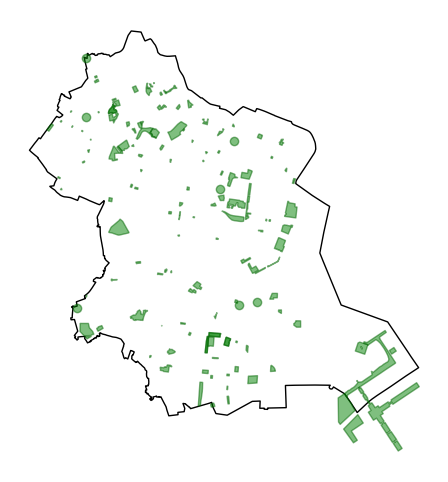

In [9]:
# Create a plot to visualize the admin boundary and park polygons
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks in Minato City
minato_parks.plot(ax=ax, color='green', alpha=0.5, edgecolor='darkgreen')

# Customize the plot
ax.axis('off')
plt.show()


26121 elements in <class 'geopandas.geodataframe.GeoDataFrame'>




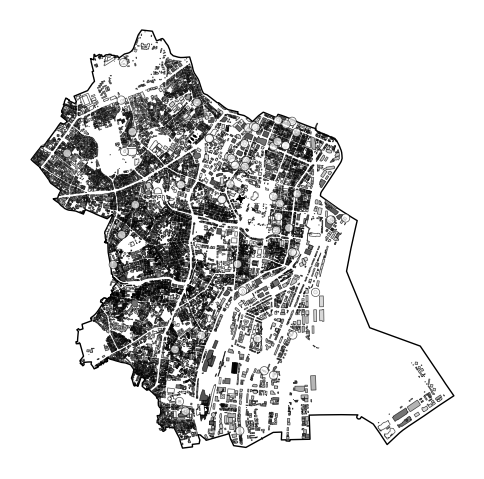

In [11]:
minato_buildings = ox.features_from_polygon(minato_polygon, tags={'building': True})
print(f"{len(minato_buildings)} elements in {type(minato_buildings)}\n\n")
minato_buildings.columns

f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks in Minato City
minato_buildings.plot(ax=ax, cmap = 'Greys', edgecolor = 'black', alpha = 0.7, linewidth = 0.5)

# Customize the plot
ax.axis('off')
plt.show()

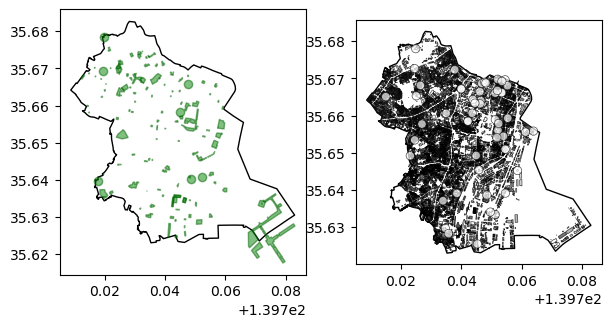

In [12]:
f, ax = plt.subplots(1, 2, figsize=(7, 4))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax[0], color='none', edgecolor='k')

# Plot the parks in Minato City
minato_parks.plot(ax=ax[0], color='green', alpha=0.5, edgecolor='darkgreen')

# Plot the Minato administrative boundary
minato_district.plot(ax=ax[1], color='none', edgecolor='k')

# Plot the parks in Minato City
minato_buildings.plot(ax=ax[1], cmap = 'Greys', edgecolor = 'black', alpha = 0.7, linewidth = 0.5)

plt.show()

In [13]:
minato_district = ox.geocode_to_gdf('Minato, Tokyo')
print(type(minato_district))

minato_polygon = minato_district.geometry.values[0]
print(type(minato_polygon))

# Download the road network for all transport modes
minato_roads = ox.graph_from_polygon(minato_polygon, network_type='drive')
print("Type of the road network graph (all modes):", type(minato_roads))
print("Number of nodes (all modes):", minato_roads.number_of_nodes())
print("Number of edges (all modes):", minato_roads.number_of_edges())


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.polygon.Polygon'>
Type of the road network graph (all modes): <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes (all modes): 2972
Number of edges (all modes): 6625


In [15]:
# Convert the network graph to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(minato_roads)

# Display the first few rows of the nodes GeoDataFrame
display(nodes.head(3))

# Display the first few rows of the edges GeoDataFrame
display(edges.head(3))

# Print the features stored in each GeoDataFrame
print("Keys in the nodes table:", list(nodes.keys()))
print("Keys in the edges table:", list(edges.keys()))
print()
# Print the total number of nodes and edges
print("Number of nodes in the node table:", len(nodes))
print("Number of edges in the node table:", len(edges))

,y,x,highway,ref,street_count,junction,geometry
osmid,,,,,,,
31236584,35.634935,139.768683,motorway_junction,1101,3,NaN,POINT (139.76868 35.63494)
31236646,35.634417,139.777989,NaN,NaN,3,NaN,POINT (139.77799 35.63442)
31236657,35.633476,139.778439,NaN,NaN,3,NaN,POINT (139.77844 35.63348)


,,,osmid,bridge,highway,lanes,oneway,reversed,length,geometry,name,ref,maxspeed,access,tunnel,width,junction
u,v,key,,,,,,,,,,,,,,,
31236584,31236646,0,"[4848889, 4848756, 820214407]",yes,motorway_link,1,True,False,971.162374,"LINESTRING (139.76868 35.63494, 139.76895 35.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
31236646,573342136,0,333682057,yes,tertiary,NaN,True,False,40.061292,"LINESTRING (139.77799 35.63442, 139.77824 35.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
31236657,298984113,0,863283179,yes,tertiary,NaN,True,False,101.078790,"LINESTRING (139.77844 35.63348, 139.77788 35.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keys in the nodes table: ['y', 'x', 'highway', 'ref', 'street_count', 'junction', 'geometry']
Keys in the edges table: ['osmid', 'bridge', 'highway', 'lanes', 'oneway', 'reversed', 'length', 'geometry', 'name', 'ref', 'maxspeed', 'access', 'tunnel', 'width', 'junction']

Number of nodes in the node table: 2972
Number of edges in the node table: 6625


(np.float64(139.70503459),
 np.float64(139.78663941),
 np.float64(35.620055535000006),
 np.float64(35.685632365))

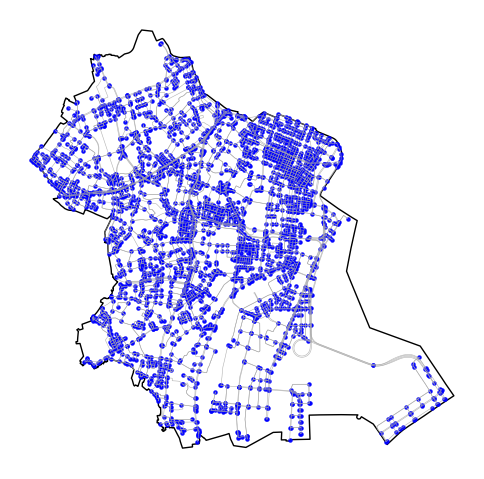

In [16]:
f, ax = plt.subplots(1,1,figsize=(6,6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

nodes.plot(ax=ax, color = 'blue', markersize = 5, alpha = 0.9)
edges.plot(ax=ax, color = 'darkgrey', linewidth = 0.4, alpha = 0.9)

ax.axis('off')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 40.8 MB/s eta 0:00:00a 0:00:01
1.6.2


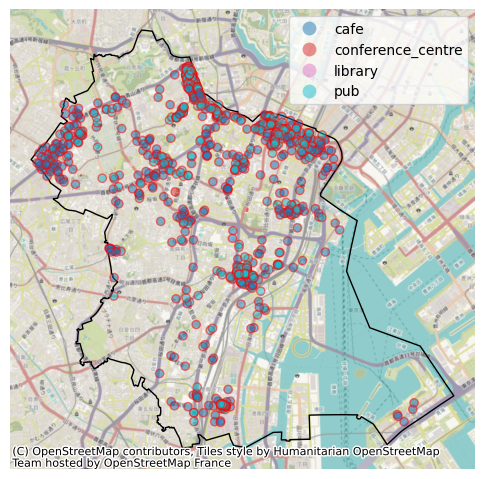

In [17]:
!pip install contextily
import contextily as ctx

print(ctx.__version__)

# Create a plot to visualize the admin boundary and points of interest
f, ax = plt.subplots(1, 1, figsize=(6,6))

# Plot the administrative boundary
admin_minato.plot(ax=ax, color='None', edgecolor='k')

# Plot the amenity POI
minato_poi.plot(column='amenity', ax=ax, alpha=0.5, edgecolor='red', legend=True)

# Query ESRI to add basemap using Contextily
ctx.add_basemap(ax, crs = admin_minato.crs, url=ctx.providers.Esri.WorldTopoMap)

# Customize the plot
ax.axis('off')
plt.show()
